# Lab | Classification, Handling Imbalanced Data

<b>TASK:</b> Identify customers that are more likely to default/churn and thus prevent losses from such customers.<br>
Using historical customer data from an internet service provider 

In [54]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

In [55]:
churnData = pd.read_csv("DATA_Customer-Churn.csv")
churnData.head()

# churn: Yes/No = target variable

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


### Preprocessing

In [56]:
churnData.rename(columns=lambda name:name.lower().replace(' ','_'), inplace=True)

In [57]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   seniorcitizen     7043 non-null   int64  
 2   partner           7043 non-null   object 
 3   dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   phoneservice      7043 non-null   object 
 6   onlinesecurity    7043 non-null   object 
 7   onlinebackup      7043 non-null   object 
 8   deviceprotection  7043 non-null   object 
 9   techsupport       7043 non-null   object 
 10  streamingtv       7043 non-null   object 
 11  streamingmovies   7043 non-null   object 
 12  contract          7043 non-null   object 
 13  monthlycharges    7043 non-null   float64
 14  totalcharges      7043 non-null   object 
 15  churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [58]:
churnData.seniorcitizen.value_counts()
# seniorcitizen already dummy encoded (assume 1 as senior?)

seniorcitizen
0    5901
1    1142
Name: count, dtype: int64

In [59]:
churnData.contract.value_counts()

contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [60]:
# convert totalcharges column to numeric column
churnData.totalcharges = pd.to_numeric(churnData.totalcharges, errors='coerce')

In [61]:
# check for null values
churnData.isna().sum()

gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

In [62]:
# fill nas with mean
churnData.totalcharges = churnData.totalcharges.fillna(churnData.totalcharges.mean())

In [63]:
# check for duplicates and drop
churnData.duplicated().any()
churnData.drop_duplicates(inplace=True)

In [64]:
# encode the target variable
churn_encoder = OrdinalEncoder(categories=[['No','Yes']])
churnData['churn'] = churn_encoder.fit_transform(churnData[['churn']])

Use the following features: <b>tenure, SeniorCitizen, MonthlyCharges</b> and <b>TotalCharges</b>:
- Split the data into a training set and a test set.
- Scale the features either by using normalizer or a standard scaler.
- Fit a logistic Regression model on the training data.
- Fit a Knn Classifier(NOT KnnRegressor please!)model on the training data.

In [65]:
churnData.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,0.00
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.50,0.00
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,1.00
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,0.00
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,1.00


<b>Splitting the data

In [66]:
X = churnData[['tenure','seniorcitizen','monthlycharges','totalcharges']]
y = churnData[['churn']]

In [68]:
# train test split
TT_SPLIT = 0.2     
RAND_STATE = 99  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TT_SPLIT,random_state=RAND_STATE) 

array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'seniorcitizen'}>,
        <Axes: title={'center': 'monthlycharges'}>,
        <Axes: title={'center': 'totalcharges'}>]], dtype=object)

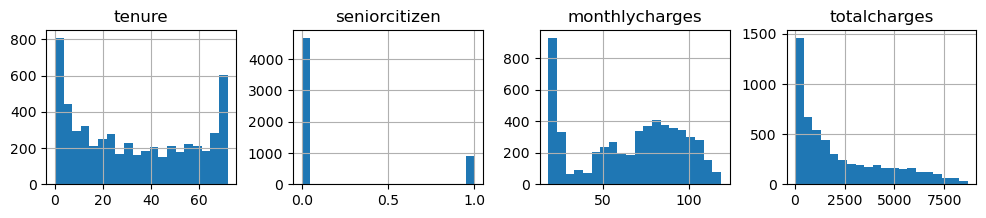

In [70]:
X_train.hist(bins=20, figsize=(12,2), layout=(1,4), sharex=False)

In [71]:
# transform the data using PowerTransformer because no gaussian distribution

pt = PowerTransformer()
pt.fit(X_train)

X_train = pt.transform(X_train)
X_train = pd.DataFrame(X_train)
X_train.columns = X.columns

X_test = pt.transform(X_test)
X_test = pd.DataFrame(X_test)
X_test.columns = X.columns

In [72]:
def evaluate_classification_model(y_train, y_pred_train, y_test, y_pred_test):
    """
    Generates performance metrics and comparisons of labels with their predicted values
    :param y_train: training labels
    :param y_pred_train: predictions from the model on the training set
    :param y_test: test labels
    :param y_pred_test: predictions from the model on the test set
    :returns: 3 dfs - Accuracy, Precision, and Recall scores, y_train vs. y_pred_train and y_test vs. y_pred_dist
    """
    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})
    
    pd.options.display.float_format = '{:.2f}'.format

    df_train = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train})
    df_test  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test})

    return performance_df, df_train, df_test



### Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [74]:
log_model = LogisticRegression() 

log_model.fit(X_train, y_train)

y_pred_train_log = log_model.predict(X_train)
y_pred_test_log = log_model.predict(X_test)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)


/Users/florakwong/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Error_metric,Train,Test
0,Accuracy,0.79,0.79
1,Precision,0.65,0.66
2,Recall,0.43,0.45


In [93]:
y_pred_test_log

array([0., 0., 0., ..., 0., 0., 1.])

In [94]:
#Error metrics table

error_metrics_log, y_train_vs_predicted_log, y_test_vs_predicted_log = evaluate_classification_model(y_train['churn'].values, y_pred_train_log, y_test.churn.values, y_pred_test_log)
error_metrics_log

,Error_metric,Train,Test
0,Accuracy,0.79,0.79
1,Precision,0.65,0.66
2,Recall,0.43,0.45


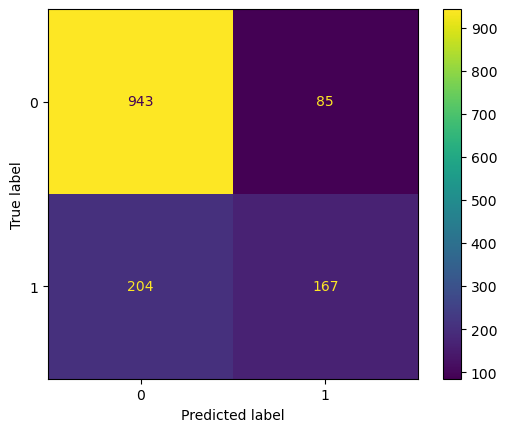

In [96]:
# confusion matrix for log_model

cm_log = confusion_matrix(y_test, y_pred_test_log, labels = log_model.classes_)
disp = ConfusionMatrixDisplay(cm_log)
disp.plot()

### KNN Classification

In [95]:
knn_model = KNeighborsClassifier(n_neighbors=5,weights='uniform')
knn_model.fit(X_train, y_train) 
y_pred_knn = knn_model.predict(X_test.values) 
y_pred_train_knn = knn_model.predict(X_train.values)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_knn),
                                         precision_score(y_train, y_pred_train_knn),
                                         recall_score(y_train, y_pred_train_knn)],
                               'Test': [accuracy_score(y_test, y_pred_knn),
                                        precision_score(y_test, y_pred_knn),
                                        recall_score(y_test, y_pred_knn)]})

display(performance_log)

/Users/florakwong/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/florakwong/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/florakwong/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


,Error_metric,Train,Test
0,Accuracy,0.83,0.77
1,Precision,0.73,0.58
2,Recall,0.58,0.49


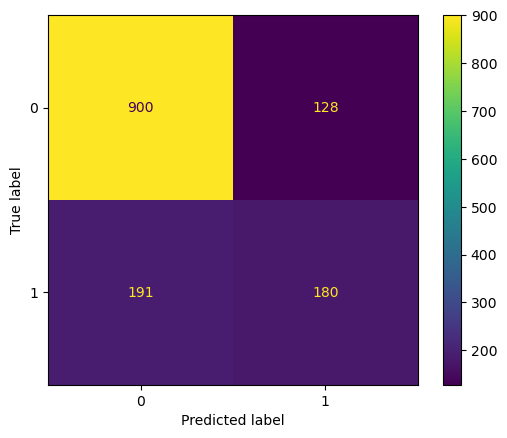

In [97]:
# confusion matrix for knn_model

cm_knn = confusion_matrix(y_test, y_pred_knn, labels = knn_model.classes_)
disp = ConfusionMatrixDisplay(cm_knn)
disp.plot()